# Data Cleaning for YOLO v3

# Mounting the Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

# Cleaning the CSV

In [0]:
import pandas as pd
import numpy as np
from copy import deepcopy
import warnings
import matplotlib.pyplot as plt
import cv2
import os

warnings.filterwarnings('ignore')

In [0]:
df = pd.read_csv(r'/content/drive/My Drive/VAUV Dataset/json_csv/fixed_final_data_cleaned.csv')
image_dir = r'/content/drive/My Drive/VAUV Dataset/Clipped Images/2018_VID_1_3'

In [0]:
df.head(2)

Unnamed: 0                         ID  ...       x4       y4
0           0  ck3rirb15emsq0a479nj01evq  ...    0.000    0.000
1           1  ck3risionulfl0804x8vo2ow9  ...  633.143  454.857

[2 rows x 26 columns]

In [0]:
def get_max_min(df):
    ''' Note that this works only for the cases where we have all four cordinates'''
    df['x_min'] = -1.
    df['y_min'] = -1.
    df['x_max'] = -1.
    df['y_max'] = -1.

    for i in range(len(df)):
        df['x_min'][i] = min(df['x1'][i], df['x2'][i], df['x3'][i], df['x4'][i]).astype('float32')
        df['x_max'][i] = max(df['x1'][i], df['x2'][i], df['x3'][i], df['x4'][i]).astype('float32')

        df['y_min'][i] = min(df['y1'][i], df['y2'][i], df['y3'][i], df['y4'][i]).astype('float32')
        df['y_max'][i] = max(df['y1'][i], df['y2'][i], df['y3'][i], df['y4'][i]).astype('float32')

    return df


In [0]:
def fill_class_id(df):
    df['class_id'] = 1
    return(df)

In [0]:
def check_dims(df):
    for i in ['1', '2', '3', '4']:
        print(np.max(df[f'x{i}']), end=' ')
        print(np.max(df[f'y{i}']), end=' ')
        print()

In [0]:
check_dims(df)

1272.849 720.0 
1279.553 525.587 
1280.0 509.49699999999996 
1271.508 720.0 


In [0]:
def show_points(img_path, ):
    # img = cv2.imread(img_path)
    # img = cv2.circle(img, (int(df['x1']), int(df['y1'])), 2, (0,0,255), 8)
    # plt.imshow(img[...,::-1])

    # need to work with this

In [0]:
# def complete_gate(df):
#     for i in range(len(df)):
#         if(df['x1'] == 0 and df['x2'] == 0 and df['y1'] == 0 and df['x2'] == 0 and df['y2'] == 0):
            
            # Means gate is incomplete



In [0]:
def resize_column(df, column_list, img_shape=(720, 1280), resize_shape=(416, 416)):

    #  Need to work on this. Naive division does not work.
    x_div = img_shape[1]
    y_div = img_shape[0]

    target_x = resize_shape[1]
    target_y = resize_shape[0]

    for cl in column_list:
        if(cl[0] == 'x'):
            new_column = cl + '_resized'
            df[new_column] = 1.
            
            for i, val in enumerate(df[cl]):
                val = (val / x_div) * target_x
                df[new_column][i] = val

        elif(cl[0] == 'y'):
            new_column = cl + '_resized'
            df[new_column] = 1.
            for i, val in enumerate(df[cl]):
                val = (val / y_div) * target_y
                df[new_column][i] = val

    return df    

In [0]:
df = get_max_min(df)

In [0]:
df = fill_class_id(df)

In [0]:
column_resized = ['x1', 'x2', 'x3', 'x4', 'y1', 'y2', 'y3', 'y4', 'x_min', 'y_min', 'x_max', 'y_max']
df = resize_column(df, column_resized)

In [0]:
df.head()

Unnamed: 0                         ID  ... x_max_resized y_max_resized
0           0  ck3rirb15emsq0a479nj01evq  ...     94.268200    367.970494
1           1  ck3risionulfl0804x8vo2ow9  ...    211.342953    271.390305
2           2  ck3risiw1ulg10804g719lwtq  ...    396.670950    414.265503
3           3  ck3ritbw7oqfn087737jgon7l  ...      0.000000      0.000000
4           4  ck3ritc9rkd6n07828afl92a9  ...    116.491702    197.541637

[5 rows x 43 columns]

# Testing an Image with cordinates

Originally

In [0]:
img = cv2.imread('/content/2018_VID_1_3_frame325.jpg')
print(img.shape)

(720, 1280, 3)


In [0]:
img = cv2.circle(img, (293, 427), 5, (0,0,255), 8)

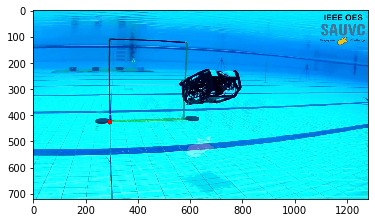

In [0]:
plt.imshow(img[...,::-1])

In [0]:
img = cv2.circle(img, (290, 106), 5, (0,0,255), 8)

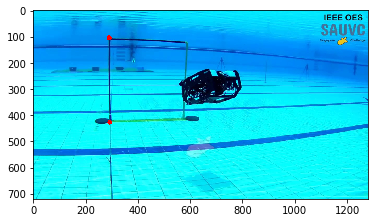

In [0]:
plt.imshow(img[...,::-1])

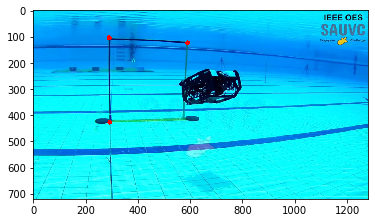

In [0]:
img = cv2.circle(img, (590,	125), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])

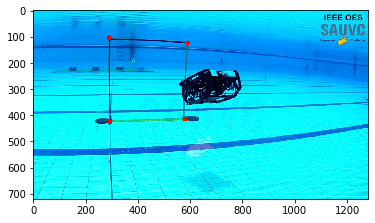

In [0]:
img = cv2.circle(img, (581, 414), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])

After resizing

1 2 Case

In [0]:
img = cv2.imread('/content/2018_VID_1_3_frame854.jpg')
print(img.shape)

(720, 1280, 3)


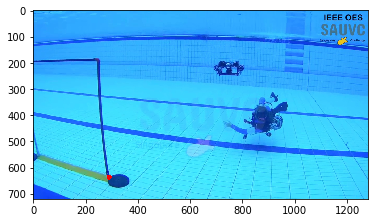

In [0]:
img = cv2.circle(img, (290, 636), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()

Another 4 cord case

(720, 1280, 3)


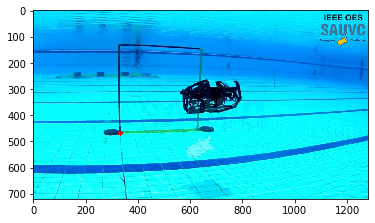

In [0]:
img = cv2.imread('/content/2018_VID_1_3_frame373.jpg')
print(img.shape)
img = cv2.circle(img, (333, 469), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()

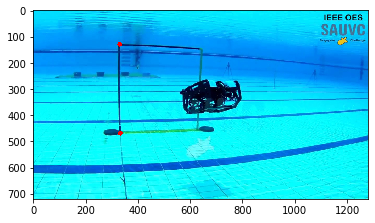

In [0]:
img = cv2.circle(img, (331, 130), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()

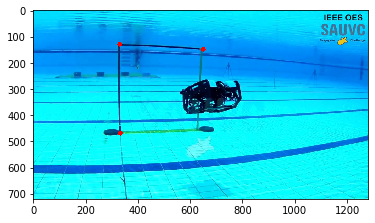

In [0]:
# 650 	149.714 	633.143 	454.857 	
img = cv2.circle(img, (650, 149), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()

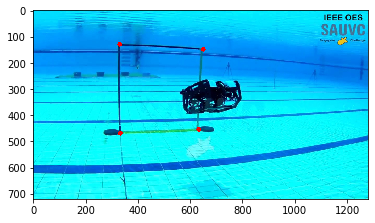

In [0]:
img = cv2.circle(img, (633, 454), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()

Vauge Case

733.779 	716.998 	803.659 	39.890 	1220.526 	184.468 	1109.683 	704.950

(720, 1280, 3)


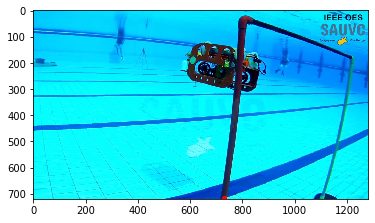

In [0]:
img = cv2.imread('/content/2018_VID_1_3_frame116.jpg')
print(img.shape)
img = cv2.circle(img, (733, 716), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()

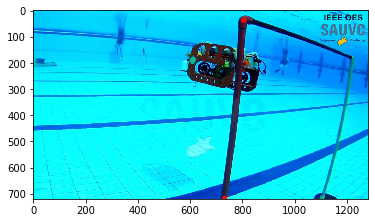

In [0]:
img = cv2.circle(img, (803, 39), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()

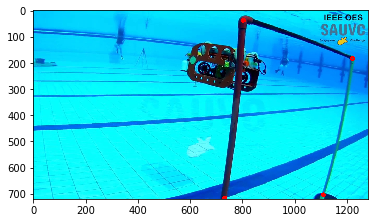

In [0]:
img = cv2.circle(img, (1220, 184), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()

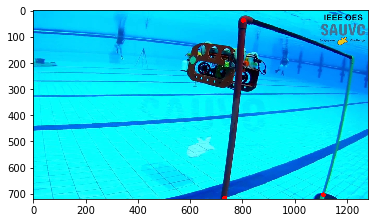

In [0]:
img = cv2.circle(img, (1109, 704), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()

This is confirmed 1-2, 1-2 case checked from labelbox

In [0]:
img = cv2.imread('/content/2018_VID_1_3_frame867.jpg')
print(img.shape)

(720, 1280, 3)


In [0]:
for i in range(len(df)):
    if(df['External ID'][i] == '2018_VID_1_3_frame867.jpg'):
        print(df['x1'][i], df['y1'][i], df['x2'][i], df['y2'][i], df['x3'][i], df['y3'][i], df['x4'][i], df['y4'][i])


37.714 556.571 6.857 424.0 266.286 178.28599999999997 286.857 642.286


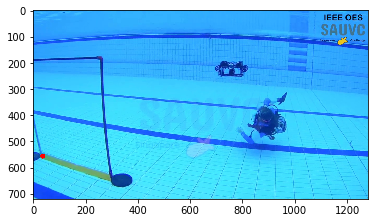

In [0]:
img = cv2.circle(img, (37, 556), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()

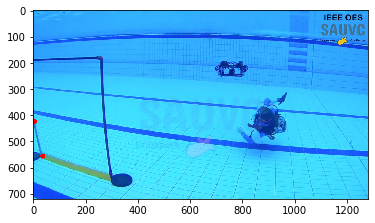

In [0]:
img = cv2.circle(img, (6, 424), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()

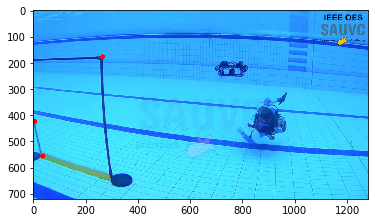

In [0]:
img = cv2.circle(img, (266, 178), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()

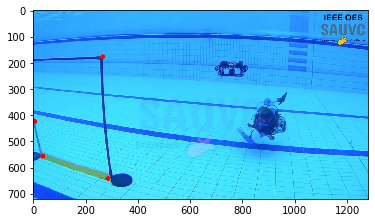

In [0]:
img = cv2.circle(img, (286, 642), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()

# Scaled Image testing

## 1234 Case

In [0]:
img = cv2.imread('/content/2018_VID_1_3_frame373.jpg')
print(img.shape)

(720, 1280, 3)


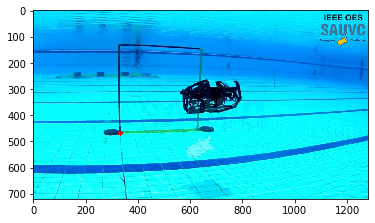

In [0]:
img = cv2.circle(img, (333, 469), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])

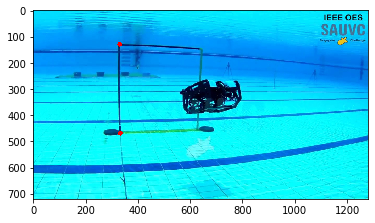

In [0]:
img = cv2.circle(img, (331 , 130), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])

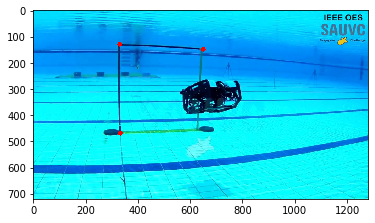

In [0]:
# 650.286 	149.714
img = cv2.circle(img, (650, 149), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])

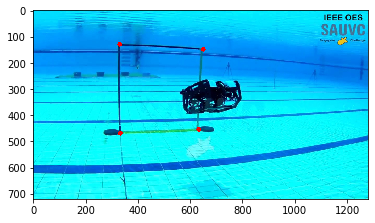

In [0]:
img = cv2.circle(img, (633, 454), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
# 633.143 	454.857 	

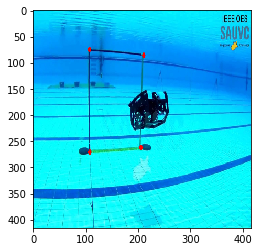

In [0]:
img_resized = cv2.resize(img, (416, 416))
plt.imshow(img_resized[...,::-1])

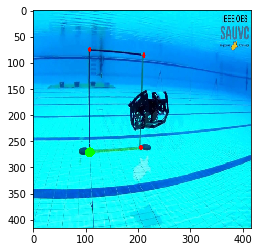

In [0]:
# 108.457050 	271.390311 	
img_resized = cv2.circle(img_resized, (108, 271), 5, (0,255,0), 8)
plt.imshow(img_resized[...,::-1])

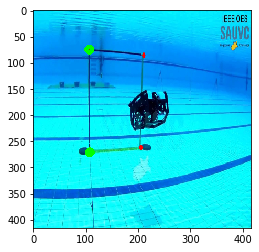

In [0]:
# 107.714425 	86.501422 	
img_resized = cv2.circle(img_resized, (107, 75), 5, (0,255,0), 8)
plt.imshow(img_resized[...,::-1])

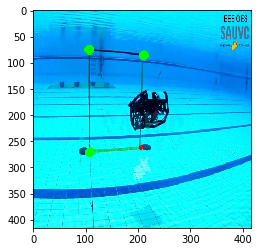

In [0]:
img_resized = cv2.circle(img_resized, (211, 86), 5, (0,255,0), 8)
plt.imshow(img_resized[...,::-1])

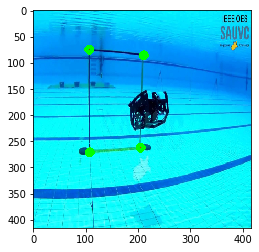

In [0]:
img_resized = cv2.circle(img_resized, (205,262), 5, (0,255,0), 8)
plt.imshow(img_resized[...,::-1])

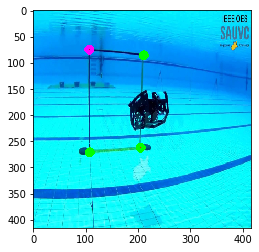

In [0]:
img_resized = cv2.circle(img_resized, (107, 75), 5, (255,0,255), 8)
plt.imshow(img_resized[...,::-1])

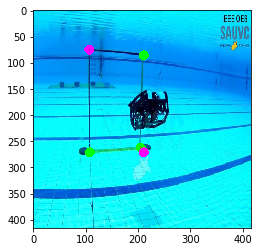

In [0]:
img_resized = cv2.circle(img_resized, (211, 271), 5, (255,0,255), 8)
plt.imshow(img_resized[...,::-1])

Stuff seems to be fine.
- The minor mistakes in cordinates are due to taking int() 
- That is opencv problem

## 12 Case Before Gate Completion

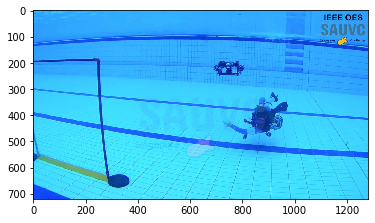

In [0]:
img = cv2.imread('/content/2018_VID_1_3_frame854.jpg')
plt.imshow(img[...,::-1])
plt.show()

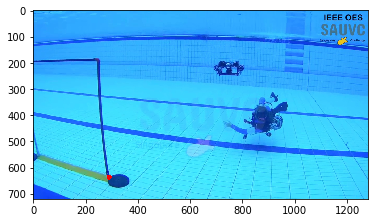

In [0]:
# 290.056 	636.872 	247.151 	190.391 	
img = cv2.circle(img, (290, 636), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])

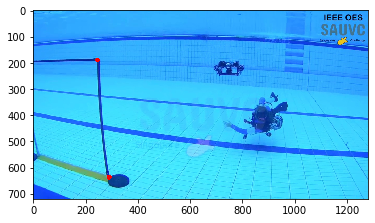

In [0]:
img = cv2.circle(img, (247, 190), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])

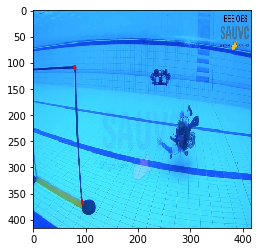

In [0]:
img_resized = cv2.resize(img, (416, 416))
plt.imshow(img_resized[...,::-1])

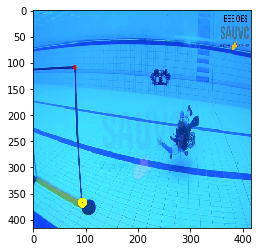

In [0]:
img_resized = cv2.circle(img_resized, (94, 367), 5, (0,255,255), 8)
plt.imshow(img_resized[...,::-1])

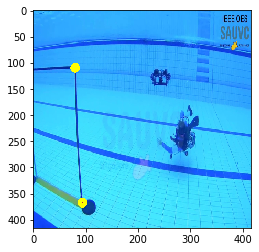

In [0]:
img_resized = cv2.circle(img_resized, (80, 110), 5, (0,255,255), 8)
plt.imshow(img_resized[...,::-1])

## 12 12 Case

In [0]:
img = cv2.imread('/content/2018_VID_1_3_frame867.jpg')
print(img.shape)

(720, 1280, 3)


In [0]:
for i in range(len(df)):
    if(df['External ID'][i] == '2018_VID_1_3_frame867.jpg'):
        print(df['x1'][i], df['y1'][i], df['x2'][i], df['y2'][i], df['x3'][i], df['y3'][i], df['x4'][i], df['y4'][i])

        print(df['x1_resized'][i], df['y1_resized'][i], df['x2_resized'][i], df['y2_resized'][i], df['x3_resized'][i], 
        df['y3_resized'][i], df['x4_resized'][i], df['y4_resized'][i])
        
        print(df['x_max_resized'][i], df['x_min_resized'][i])


37.714 556.571 6.857 424.0 266.286 178.28599999999997 286.857 642.286
12.25705 321.57435555555554 2.228525 244.9777777777778 86.54294999999999 103.00968888888887 93.22852500000002 371.09857777777773
93.22852325439453 2.228524959087372


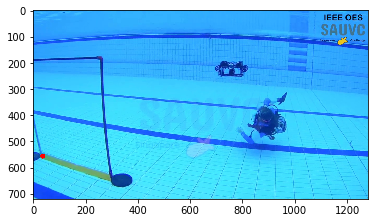

In [0]:
img = cv2.circle(img, (37, 556), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()

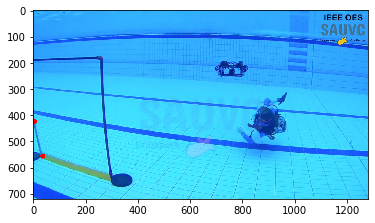

In [0]:
img = cv2.circle(img, (6, 424), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()

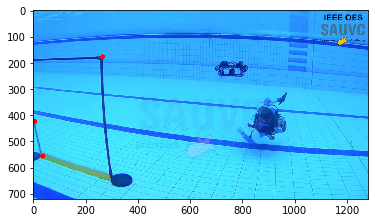

In [0]:
img = cv2.circle(img, (266, 178), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()

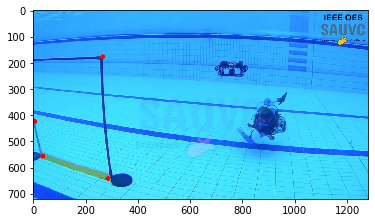

In [0]:
img = cv2.circle(img, (286, 642), 5, (0,0,255), 8)
plt.imshow(img[...,::-1])
plt.show()

12.25705 321.57435555555554 2.228525 244.9777777777778 86.54294999999999 103.00968888888887 93.22852500000002 371.09857777777773

In [0]:
img_resized = cv2.resize(img, (416, 416))

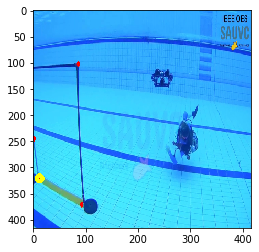

In [0]:
img = cv2.circle(img_resized, (12, 321), 5, (0,255,255), 8)
plt.imshow(img[...,::-1])
plt.show()

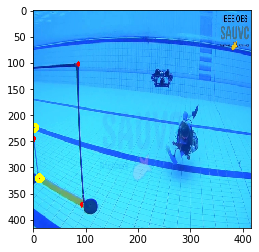

In [0]:
img = cv2.circle(img_resized, (2, 224), 5, (0,255,255), 8)
plt.imshow(img[...,::-1])
plt.show()

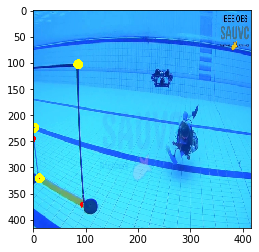

In [0]:
img = cv2.circle(img_resized, (86, 103), 5, (0,255,255), 8)
plt.imshow(img[...,::-1])
plt.show()

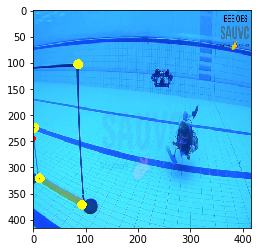

In [0]:
img = cv2.circle(img_resized, (93, 371), 5, (0,255,255), 8)
plt.imshow(img[...,::-1])
plt.show()

# Saving the final DataFame

In [0]:
df_final = deepcopy(df)

In [0]:
for col in df.columns:
    print(col)

In [0]:
# Remove 1-2 Case.
# This also removes the no gate case.
# We have cases with 1-2 1-2 and 1234 gate labelled scenarios

df_final = df_final[(df['x3'] > 0) & df['y3'] > 0]

In [0]:
df_final.head()

Unnamed: 0                         ID  ... x_max_resized y_max_resized
1           1  ck3risionulfl0804x8vo2ow9  ...    211.342953    271.390305
2           2  ck3risiw1ulg10804g719lwtq  ...    396.670950    414.265503
4           4  ck3ritc9rkd6n07828afl92a9  ...    116.491702    197.541637
6           6  ck3riuaogoqs60877qbrd9z5e  ...    207.564174    303.672475
7           7  ck3riunphdt9x0730uwdyumjq  ...    215.800000    413.358987

[5 rows x 43 columns]

In [0]:
df_final_neg = deepcopy(df)

In [0]:
df_final_neg = df_final_neg[(df['x1'] == 0) & (df['y1'] == 0)]

In [0]:
df_final_neg['class_id'] = 0

In [47]:
df_final_neg.head()

Unnamed: 0                         ID  ... x_max_resized y_max_resized
3            3  ck3ritbw7oqfn087737jgon7l  ...           0.0           0.0
10          10  ck3riv8gsumij0804zxu6cnye  ...           0.0           0.0
13          13  ck3rivzh5umtz0804c40al0kp  ...           0.0           0.0
17          17  ck3rixsd8epbi0a47g5gy8a5d  ...           0.0           0.0
18          18  ck3rixtiqepc70a47r20ijp7v  ...           0.0           0.0

[5 rows x 43 columns]

In [0]:
df_final.to_csv('Final_Cleaned_YOLO.csv')

In [0]:
df_final_neg.to_csv('Final_Neg_Cleaned_YOLO.csv')